In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import prepare
import summarize

In [2]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [3]:
def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [4]:
df = acquire.get_mall_customer_data()
df.set_index('customer_id', inplace=True)
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
summarize.df_summary(df)

--- Shape:  (200, 4)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
--- Descriptions
                       age        annual_income       spending_score
count               200.00               200.00               200.00
mean                 38.85                60.56                50.20
std                  13.97                26.26                25.82
min                  18.00                15.00                 1.00
25%                  28.75                41.50                34.75
50%                  36.00                61.50                50.00
75%                  49.00                78.00                73.00
max                  70.00               137.00                99.00
--- Nulls By Column
--- 

In [6]:
df = prepare.data_prep(
    df,
    cols_to_remove=[],
    prop_required_column=.6,
    prop_required_row=.75
)

In [7]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e764940>,
      dtype=object)

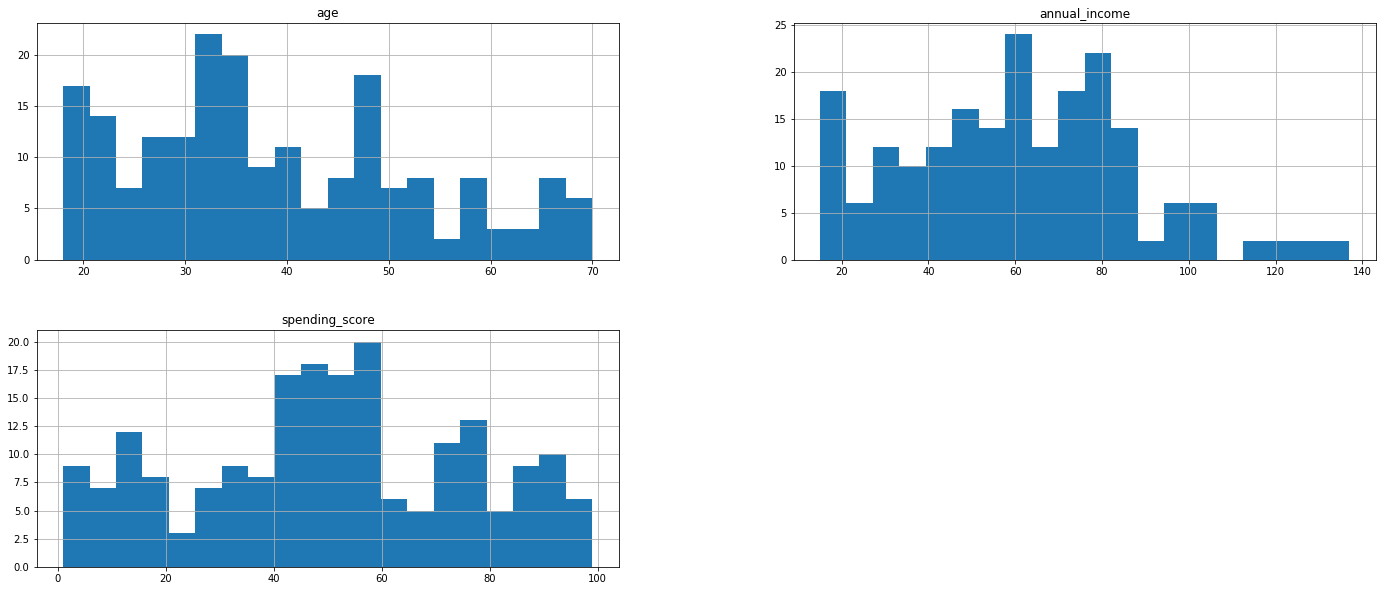

In [8]:
df.hist(figsize=(24, 10), bins=20)

In [9]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

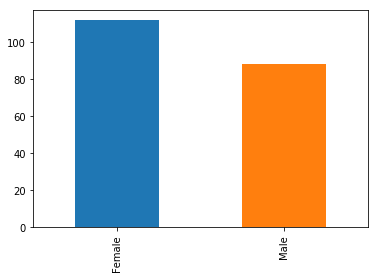

In [10]:
df.gender.value_counts().plot.bar()

In [11]:
add_upper_outlier_columns(df, k=1.5)

df.head()

,gender,age,annual_income,spending_score,age_outliers,annual_income_outliers,spending_score_outliers
customer_id,,,,,,,
1,Male,19,15,39,0,0.00,0
2,Male,21,15,81,0,0.00,0
3,Female,20,16,6,0,0.00,0
4,Female,23,16,77,0,0.00,0
5,Female,31,17,40,0,0.00,0


In [12]:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
age_outliers
count                   0.00
mean                     nan
std                      nan
min                      nan
25%                      nan
50%                      nan
75%                      nan
max                      nan
Name: age_outliers, dtype: float64
~~~
annual_income_outliers
count                   2.00
mean                    4.25
std                     0.00
min                     4.25
25%                     4.25
50%                     4.25
75%                     4.25
max                     4.25
Name: annual_income_outliers, dtype: float64
~~~
spending_score_outliers
count                   0.00
mean                     nan
std                      nan
min                      nan
25%                      nan
50%                      nan
75%                      nan
max                      nan
Name: spending_score_outliers, dtype: float64
